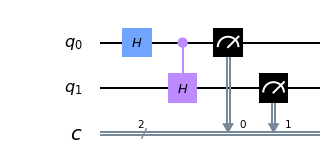

In [37]:
from qiskit import *
from math import *
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2,2)
qc.h(0)
# Haddamard controlled
qc.ch(0,1)

qc.measure(0,0)
qc.measure(1,1)
qc.draw('mpl')

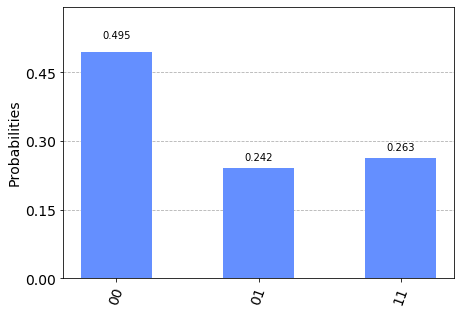

In [41]:
simulator = Aer.get_backend('qasm_simulator')
result_simulation = execute(qc,simulator).result()
plot_histogram(result_simulation.get_counts())

In [40]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-07 20:04:22,008: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [69]:
provider = IBMQ.get_provider('ibm-q')
# ibmq_ourense = nome sistema quântico IBM, há varios disponíveis
qcomp = provider.get_backend('ibmq_essex')
job = execute(qc, qcomp)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


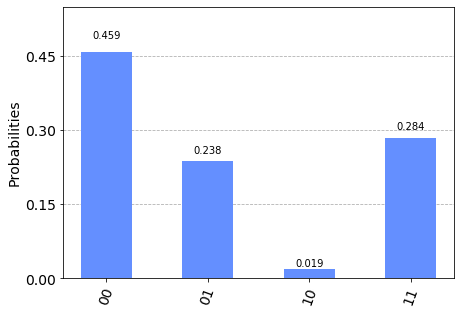

In [70]:
result_real = job.result()
plot_histogram(result_real.get_counts())

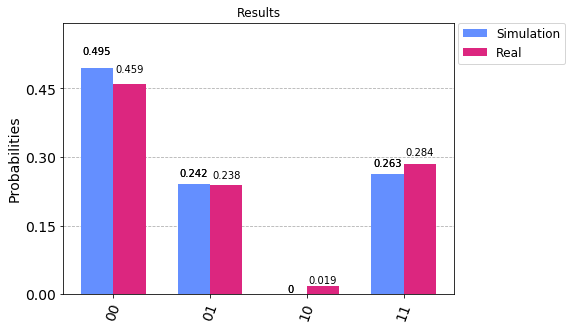

In [71]:
plot_histogram([result_simulation.get_counts(),result_real.get_counts()], legend = ['Simulation','Real'], title = 'Results')